In [1]:
import pandas as pd
import numpy as np

from modeling_arima import (
    grid_search_arima_cv,
    train_and_forecast_arima,
    residual_diagnostics,
    plot_forecast_vs_actual,
    forecast_performance
)

# Data

In [ ]:
# Load data
df = pd.read_excel('tsdata1.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,x1_spend,x2_spend,weekly_sales
Date,,,
2020-01-05,2498.160475,8677.831327,6903.818046
2020-01-12,4802.857226,11323.058306,7557.368032
2020-01-19,3927.975767,11335.297108,5635.157330
2020-01-26,3394.633937,10357.746841,7165.125548
2020-02-02,1624.074562,5902.897701,5610.827416


In [3]:
# Split dataset
split_index = int(len(df) * 0.8)
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]
# print("Training set shape:", train_df.shape)
# print("Test set shape:", test_df.shape)

# Univariate time series
train_series = train_df['weekly_sales']
test_series = test_df['weekly_sales']

# Multivariate time series
train_exog = train_df[['x1_spend', 'x2_spend']]
test_exog = test_df[['x1_spend', 'x2_spend']]

By using `df.iloc[:split_index]` for training and `df.iloc[split_index:]` for testing, I ensure that the model is trained on past data and validated on later data. 

Use `TimeSeriesSplit` later during hyperparameter tuning to ensure that the sequential nature of the data is respected and that each fold is a valid representation of the forecasting problem.

# Univariate

## ARIMA

In [4]:
# Deinfe pdq
param_grid = {
    'p': [0, 1, 2],
    'd': [0, 1],
    'q': [0, 1, 2]
}

# Grid search
best_params = grid_search_arima_cv(train_series, param_grid=param_grid, n_splits=4)
print(best_params)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Framewo

        order seasonal_order      avg_aic      avg_bic   avg_mape
2   (0, 0, 2)           None  1174.578943  1182.872877  27.437551
1   (0, 0, 1)           None  1172.657140  1178.877591  27.493294
8   (1, 0, 2)           None  1175.664663  1186.032081  27.599493
7   (1, 0, 1)           None  1174.416902  1182.710837  27.610941
0   (0, 0, 0)           None  1170.644013  1174.790980  27.620269
6   (1, 0, 0)           None  1172.527496  1178.747947  27.623585
13  (2, 0, 1)           None  1175.596782  1185.964200  27.687875
12  (2, 0, 0)           None  1174.065090  1182.359024  27.704316
14  (2, 0, 2)           None  1176.285602  1188.726503  28.138744
11  (1, 1, 2)           None  1163.659302  1173.929126  29.912814
10  (1, 1, 1)           None  1161.824902  1170.040761  29.973853
5   (0, 1, 2)           None  1161.829068  1170.044927  29.981778
4   (0, 1, 1)           None  1159.890880  1166.052774  30.005571
17  (2, 1, 2)           None  1165.419500  1177.743289  30.248036
16  (2, 1,

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


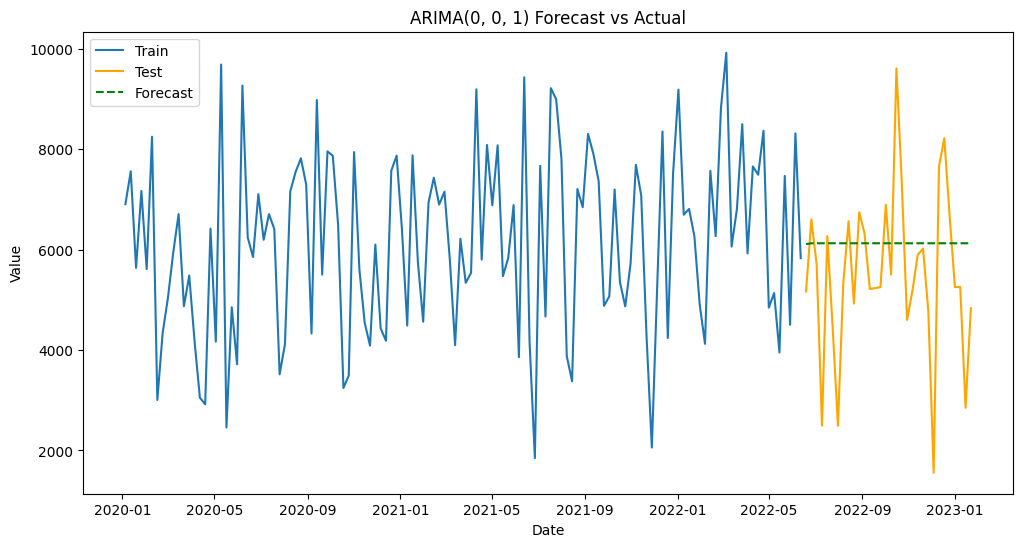

Forecast Performance for (0, 0, 1):
MAE   : 1317.34
RMSE  : 1741.64
MAPE  : 36.14%
SMAPE : 25.10%


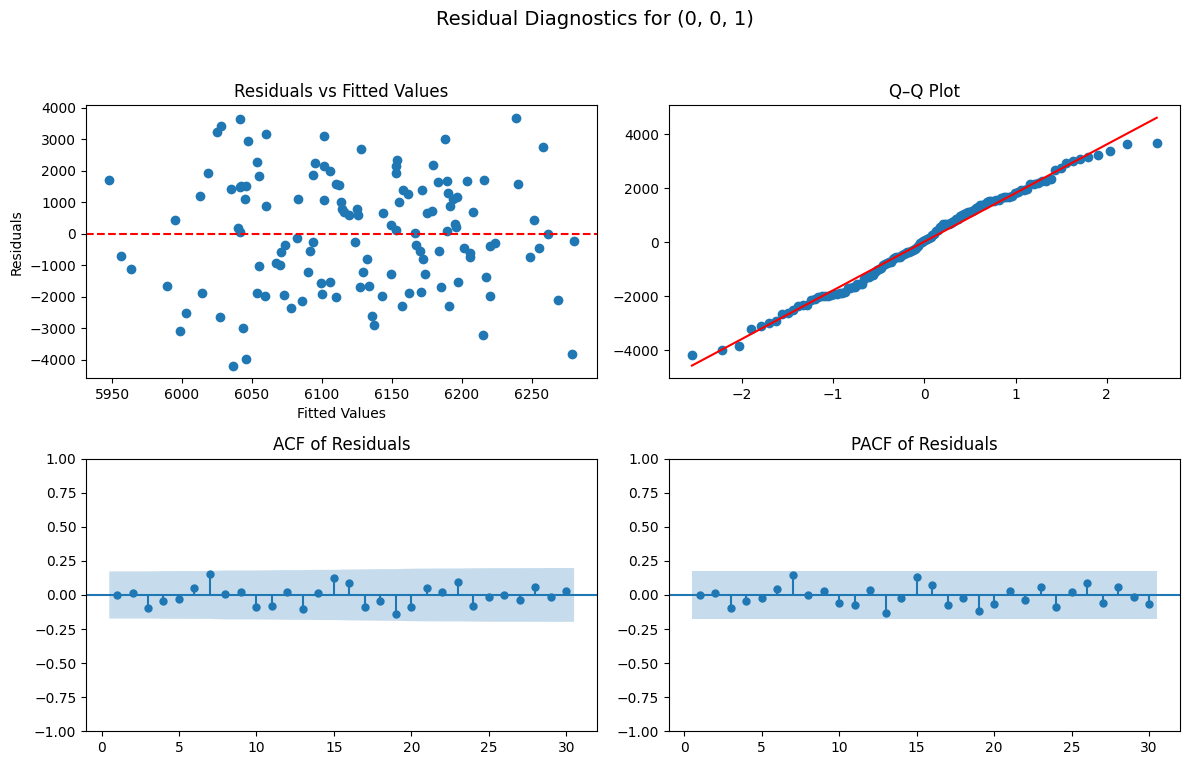

Ljung-Box test for (0, 0, 1) (lag=30):
      lb_stat  lb_pvalue
30  22.177778   0.847499


In [5]:
# Final ARIMA model
order_arima = (0, 0, 1)

# Train and forecast ARIMA
model_arima, forecast_arima, _, _ = train_and_forecast_arima(train_series, test_data=test_series, order=order_arima)

# Evaluate forecast
plot_forecast_vs_actual(train_series, test_series, forecast_arima, order_arima)
forecast_performance(test_series, forecast_arima, order_arima)

# Residual diagnostics
residual_diagnostics(model_arima, order_arima)


**Model Fit Assessment**  
None of the candidate ARIMA models meaningfully outperforms the others. All exhibit similar AIC, BIC, and MAPE scores, and struggle to capture the core structure of the time series. This suggests that the data may not be well-suited for ARIMA-type models, and that differences in performance are likely due to noise rather than meaningful signal capture.

ARIMA(0, 0, 1) slightly outperforms simpler alternatives like ARIMA(0, 0, 0), offering marginal improvement in forecast accuracy while remaining interpretable. Its inclusion of a first-order moving average component helps account for short-term shocks in the data without overfitting.

**Residual Diagnostics**  
- **No significant autocorrelation**: ACF and PACF plots of the residuals show no significant lags, and the Ljung-Box test (p = 0.847) confirms that residuals are indistinguishable from white noise. This suggests the model has sufficiently captured the serial dependence in the series.
- **Approximately normal residuals**: The Q–Q plot indicates the residuals are approximately normally distributed with no significant skew or kurtosis, validating model assumptions.

**Forecast Accuracy**  
- The model achieves a MAPE of 36.14% and SMAPE of 25.10%, indicating a slightly better approximation of the overall level than ARIMA(0, 0, 0), though it still lacks precision in forecasting short-term variability.

## SARIMA

In [10]:
# Deinfe pdq
param_grid = {
    'p': [0, 1, 2],
    'd': [0, 1],
    'q': [0, 1, 2]
}

# Define PDQM
seasonal_param_grid = {
    'P': [0, 1], 
    'D': [0, 1], 
    'Q': [0, 1], 
    'm': [7]
}

# Grid search for SARIMA
best_params = grid_search_arima_cv(
    train_series, 
    param_grid=param_grid, 
    seasonal_param_grid=seasonal_param_grid, 
    n_splits=4
)
print(best_params.head(10))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Framewo

         order seasonal_order      avg_aic      avg_bic   avg_mape
9    (0, 0, 1)   (0, 0, 1, 7)  1173.716202  1182.010137  27.431398
117  (2, 0, 2)   (1, 0, 1, 7)  1177.302927  1193.890795  27.433527
16   (0, 0, 2)   (0, 0, 0, 7)  1174.578943  1182.872877  27.437551
65   (1, 0, 2)   (0, 0, 1, 7)  1176.720899  1189.161800  27.456937
17   (0, 0, 2)   (0, 0, 1, 7)  1175.395249  1185.762666  27.488493
8    (0, 0, 1)   (0, 0, 0, 7)  1172.657140  1178.877591  27.493294
68   (1, 0, 2)   (1, 0, 0, 7)  1176.489164  1188.930065  27.523390
61   (1, 0, 1)   (1, 0, 1, 7)  1177.206784  1189.647685  27.528547
1    (0, 0, 0)   (0, 0, 1, 7)  1171.676114  1177.896565  27.537867
108  (2, 0, 1)   (1, 0, 0, 7)  1176.486700  1188.927601  27.544240


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


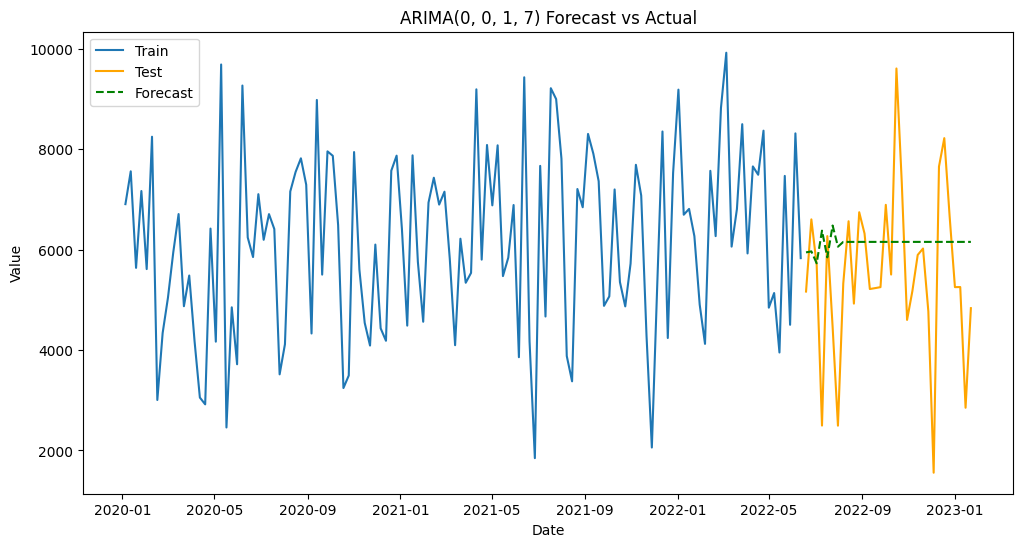

Forecast Performance for (0, 0, 1, 7):
MAE   : 1317.34
RMSE  : 1741.64
MAPE  : 36.14%
SMAPE : 25.10%


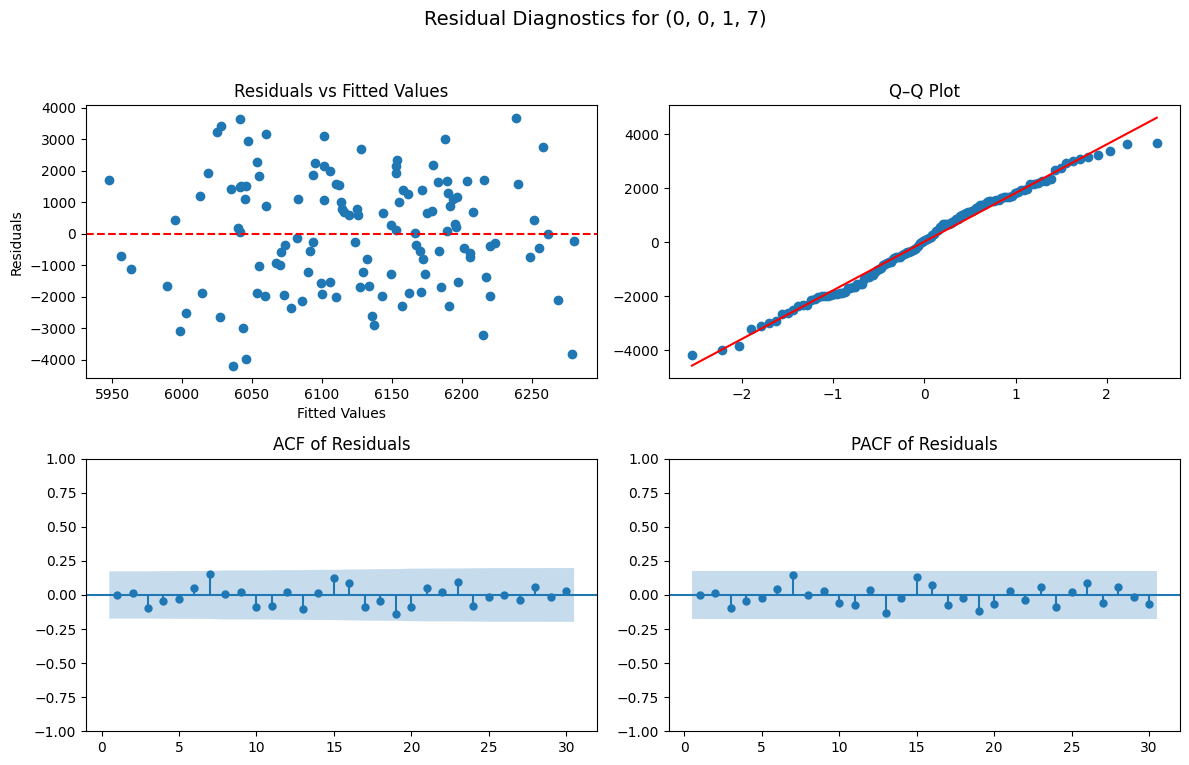

Ljung-Box test for (0, 0, 1, 7) (lag=30):
      lb_stat  lb_pvalue
30  22.177778   0.847499


In [6]:
# Final SARIMA model
order_sarima = (0, 0, 0)
seasonal_order_sarima = (0, 0, 1, 7)

# Train and forecast SARIMA
model_sarima, forecast_sarima, _, _ = train_and_forecast_arima(
    train_series, 
    test_data=test_series, 
    order=order_sarima, 
    seasonal_order=seasonal_order_sarima,
)

# Evaluate forecast
plot_forecast_vs_actual(train_series, test_series, forecast_sarima, seasonal_order_sarima)
forecast_performance(test_series, forecast_arima, seasonal_order_sarima)

# Residual diagnostics
residual_diagnostics(model_arima, seasonal_order_sarima)

**Model Fit Assessment**

While the SARIMA(0, 0, 1)(0, 0, 1, 7) model shows reasonable diagnostics and acceptable forecasting performance (MAPE = 35.93%, SMAPE = 25.02%), its improvement over simpler ARIMA models—such as ARIMA(0, 0, 1)—is marginal:
- Similar performance: Key metrics like AIC, BIC, and MAPE are very close across models, indicating SARIMA does not offer a significant gain in explanatory or predictive power.
- Weak seasonal signal: Although STL decomposition and date-based boxplots suggest some weekly cyclicity, the signal is relatively noisy and not strongly supported by the frequency domain (FFT analysis). Thus, the justification for including seasonal terms (P, Q, s) is limited.
- Higher model complexity: SARIMA introduces additional seasonal components, increasing model complexity without clear benefit. In this case, simpler models like ARIMA(0, 0, 1) are more parsimonious and equally effective.

**Future Work**
- Apply signal processing techniques such as wavelet decomposition, moving average filters, or exponential smoothing to the raw time series.
- Incorporate custom seasonality using Fourier terms. By including sine and cosine pairs of varying frequencies as external regressors, so that complex or non-integer seasonal patterns that traditional SARIMA cannot model well can be flexibly captured.


# Multivariate

## ARIMAX

In [13]:
# Deinfe pdq
param_grid = {
    'p': [0, 1, 2],
    'd': [0, 1],
    'q': [0, 1, 2]
}

# Grid search for ARIMAX
best_params = grid_search_arima_cv(train_series, param_grid=param_grid, n_splits=4, exog=train_exog)
print(best_params)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Framewo

        order seasonal_order      avg_aic      avg_bic   avg_mape
12  (2, 0, 0)           None  1101.182822  1113.623723  11.430129
0   (0, 0, 0)           None  1099.194476  1107.488411  11.438312
7   (1, 0, 1)           None  1101.330967  1113.771869  11.452601
1   (0, 0, 1)           None  1099.344160  1109.711578  11.457830
6   (1, 0, 0)           None  1099.456229  1109.823647  11.470606
2   (0, 0, 2)           None  1101.854265  1114.295167  11.483522
13  (2, 0, 1)           None  1102.849467  1117.363852  11.736587
15  (2, 1, 0)           None  1101.538926  1113.862714  11.749170
8   (1, 0, 2)           None  1103.484573  1117.998958  11.986563
14  (2, 0, 2)           None  1103.901090  1120.488958  12.122977
4   (0, 1, 1)           None  1087.728849  1097.998673  12.783350
16  (2, 1, 1)           None  1090.388175  1104.765928  13.282982
10  (1, 1, 1)           None  1088.148980  1100.472768  13.576446
5   (0, 1, 2)           None  1087.933094  1100.256883  13.603864
11  (1, 1,

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


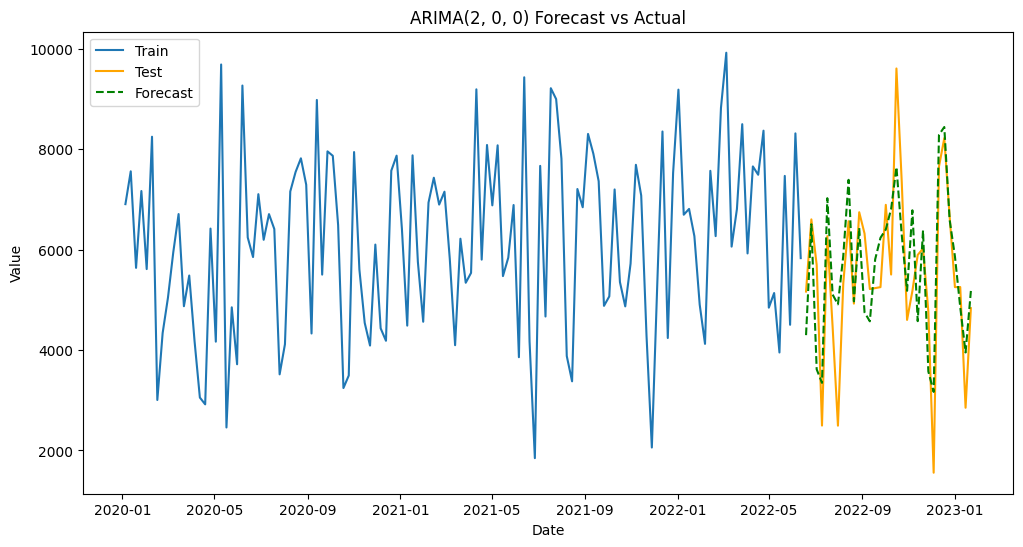

Forecast Performance for (2, 0, 0):
MAE   : 877.36
RMSE  : 1059.32
MAPE  : 20.34%
SMAPE : 18.23%


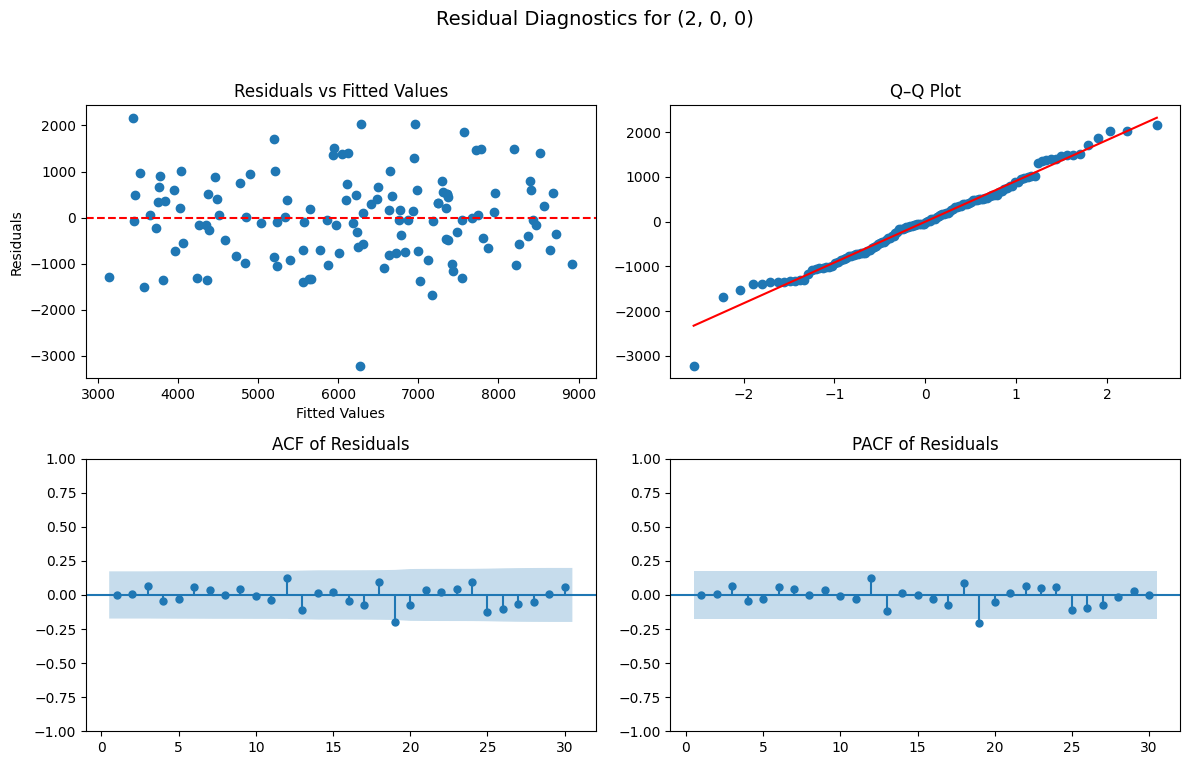

Ljung-Box test for (2, 0, 0) (lag=30):
      lb_stat  lb_pvalue
30  23.893826   0.776807


In [9]:
# Final ARIMAX model
order_arimax = (2, 0, 0)

# Train and forecast ARIMAX
model_arimax, forecast_arimax, _, _ = train_and_forecast_arima(
    train_series, 
    test_series, 
    order_arimax,
    exog_train=train_exog,
    exog_test=test_exog
)

# Evaluate forecast
plot_forecast_vs_actual(train_series, test_series, forecast_arimax, order_arimax)
forecast_performance(test_series, forecast_arimax, order_arimax)

# Residual diagnostics
residual_diagnostics(model_arimax, order_arimax)

**Model Fit Assessment**

ARIMAX(2, 0, 0) emerges as a strong candidate based on both accuracy metrics and diagnostic checks. Among all models, it achieves the lowest MAPE (20.34%) and SMAPE (18.23%), suggesting predictive capability. The use of exogenous variables enhances the model’s ability to capture variance in the target series, likely explaining its performance gain over pure ARIMA/SARIMA models.

**Residual Diagnostics**
- No significant autocorrelation: ACF/PACF plots of the residuals show no notable spikes, and the Ljung-Box test (p = 0.777) confirms that the residuals behave like white noise. This suggests the model has successfully captured the autocorrelated structure.
- Approximately normal residuals: The residuals follow a near-normal distribution as shown by the Q–Q plot, with only mild deviations in the tails. The residual time series also appears centered and randomly dispersed.

**Forecast Accuracy**
- MAPE = 20.34%, SMAPE = 18.23%, MAE = 877.36, and RMSE = 1059.32: These are the best-in-class metrics among all compared models, indicating both strong level estimation and better short-term tracking than ARIMA or SARIMA counterparts.
- Visual inspection confirms that the model tracks test data more closely than earlier models, especially in terms of magnitude and direction of changes.

In [ ]:
# Final SARIMAX model
order_srimax = (2, 0, 0)
seasonal_order_sarimax = (0, 0, 0, 7)

# Train and forecast SARIMAX
model_sarimax, forecast_sarimax, _, _ = train_and_forecast_arima(
    train_series, 
    test_series, 
    order_arimax,
    seasonal_order=seasonal_order_sarimax,
    exog_test=test_exog,
    exog_train=train_exog
)

# Evaluate forecast
plot_forecast_vs_actual(train_series, test_series, forecast_sarimax, seasonal_order_sarimax)
forecast_performance(test_series, forecast_sarimax, seasonal_order_sarimax)

# Residual diagnostics
residual_diagnostics(model_sarimax, seasonal_order_sarimax)